# **MILESTONE 1**
Name : **Muhammad Fawwaz Dynoeputra Isnandar**

Batch : **HCK-002**

## **OBJECTIVES**

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

## **PROBLEM STATEMENT**
Buatlah model Classification untuk memprediksi `default_payment_next_month` menggunakan dataset yang sudah kalian simpan.

# **WORKING AREA**

## **IMPORTING LIBRARIES**

First, We need to import libraries needed to succesfully perform our project

In [79]:
#Importing Pandas and Numpy Library
import pandas as pd
import numpy as np
#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Importing our Logistic Regression Model
from sklearn.linear_model import LogisticRegression
#Importing our SVM Model
from sklearn.svm import SVC
#Importing our KNN Model
from sklearn.neighbors import KNeighborsClassifier
#Importing our Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
#Importing our Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
#Importing our Random Forest and Gradient Boosting Classifier Model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#Importing our Train and Test split
from sklearn.model_selection import train_test_split
#For preprocessing purposes 
from sklearn.preprocessing import MinMaxScaler
#For evaluation purposes
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
#Importing our hyperparameter tuning library
from sklearn.model_selection import GridSearchCV
#For finding correlation between features
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')
#Setting this notebook to show all data
pd.set_option('display.max_columns', None)
pd.reset_option('max_columns')
# For showing our time
import time

## **DATA LOADING**

### RETRIEVING DATASET

For this particular project, we used a dataset available from `BigQuery` about the defaulting of Credit card users. In our code below is a query of data retrieval from Google Cloud Platform:

~~~sql
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 4000
~~~~

### LOAD DATASET TO NOTEBOOK

Then we import our retrieved dataset and assigning it into a variable called `df` (`DataFrame`)

In [2]:
df = pd.read_csv('/Users/zow/Documents/HACKTIV8/Learning_journal/Phase 1/MILESTONE/MILESTONE 1/h8dsft_P1M1_muhammad_fawwaz.csv')

## **EXPLORATORY DATA ANALYSIS**

> In this section, before we do some decision making in what to do with our data, it's better to understand our data better in doing some simple data exploration.

To understand the context of our data better, here are some information we gathered regarding the dataset that we're going to analyze :
- `limit_balance` : Amount of given credit in NT dollars (includes individual and family/supplementary credit
- `sex`: Gender (1=male, 2=female)
- `education_level`: Education Level (1 = Graduate school, 2 = University, 3 = High school, 4 = Others, 5 = Unknown, 6 = Unknown)
- `marital_status` : Marital status (1 = Married, 2 = Single, 3 = Others)
- `age`: Age in years
- `pay_0`: Repayment status in September, 2005 (-1= Pay duly, 1 = Payment delay for one month, 
2 = Payment delay for two months, ... 8 = Payment delay for eight months, 
9 = Payment delay for nine months and above)
- `pay_2`: Repayment status in August, 2005 (scale same as above)
- `pay_3`: Repayment status in July, 2005 (scale same as above)
- `pay_4`: Repayment status in June, 2005 (scale same as above)
- `pay_5`: Repayment status in May, 2005 (scale same as above)
- `pay_6`: Repayment status in April, 2005 (scale same as above)
- `bill_amt_1`: Amount of bill statement in September, 2005 (NT dollar)
- `bill_amt_2`: Amount of bill statement in August, 2005 (NT dollar)
- `bill_amt_3`: Amount of bill statement in July, 2005 (NT dollar)
- `bill_amt_4`: Amount of bill statement in June, 2005 (NT dollar)
- `bill_amt_5`: Amount of bill statement in May, 2005 (NT dollar)
- `bill_amt_6`: Amount of bill statement in April, 2005 (NT dollar)
- `pay_amt_1`: Amount of previous payment in September, 2005 (NT dollar)
- `pay_amt_2`: Amount of previous payment in August, 2005 (NT dollar)
- `pay_amt_3`: Amount of previous payment in July, 2005 (NT dollar)
- `pay_amt_4`: Amount of previous payment in June, 2005 (NT dollar)
- `pay_amt_5`: Amount of previous payment in May, 2005 (NT dollar)
- `pay_amt_6`: Amount of previous payment in April, 2005 (NT dollar)
- `default_payment_next_month`: Default Payment (1 = Yes, 0 = No)

From the data description on the given dataset, we can conclude that the dataset belongs to a **Taiwanese credit card issuer** because the data states the currency at **NT dollar (Taiwanese Dollars)**. The objectives of this project is we want to **predict the next default payment of users within next month**. **Defaulting** in credit cards means that a user(borrower) is **unable** to pay the bill required or when a borrower **stops making the required payments on a debt**. This can happen for several months, affecting the credit score of the borrower. Defaults expose borrowers to **legal claims** and may **limit their future access to credit**.

Next, we are going to take a glimpse at the 5 first and last rows of data from our dataframe:

In [3]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [4]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,...,10775,10998,12655,1300,3005,0,700,2000,1500,0


In [5]:
df.shape

(2965, 24)

In this dataset we have **2965 rows** of data and **24 columns**. Let's see what those columns are :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

> First we want to see the age distribution between Male (`1`) and Female (`2`) shown in our plot below :

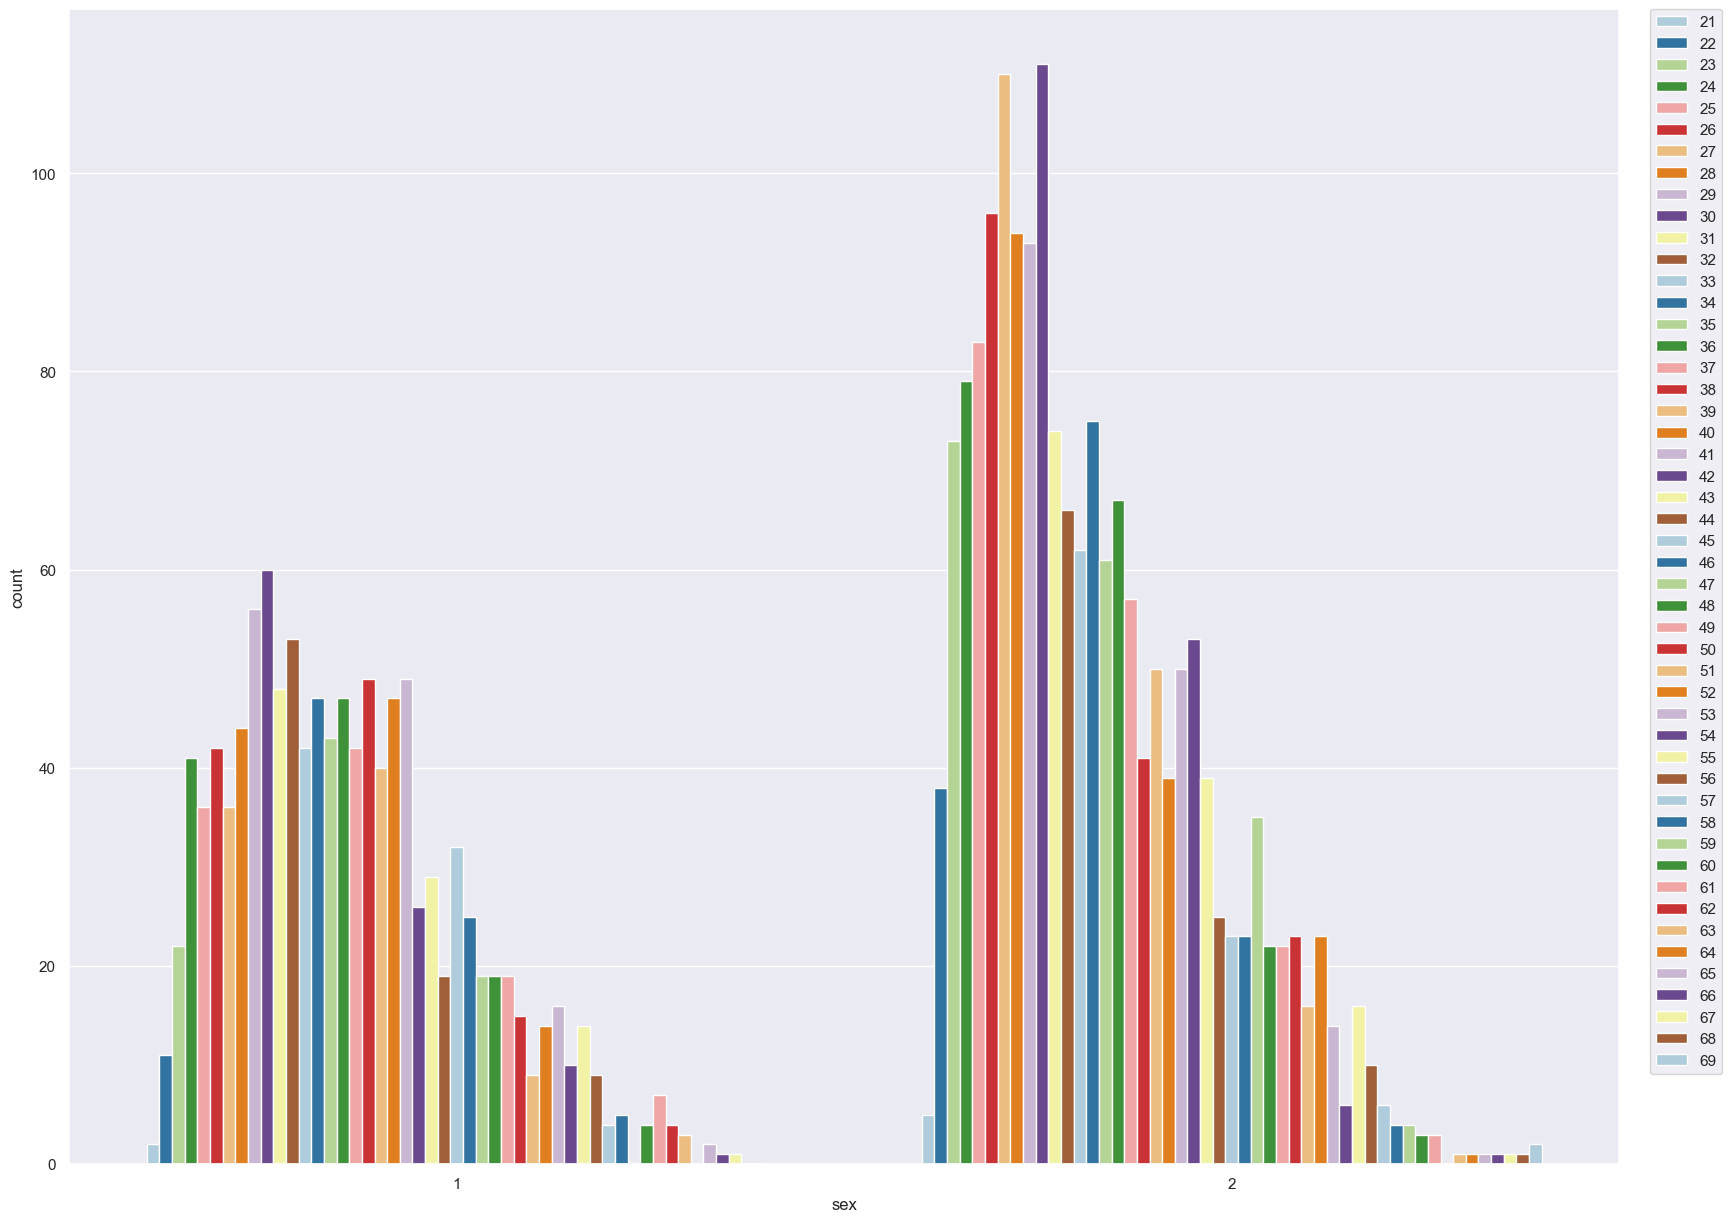

In [7]:
sns.set(rc={'figure.figsize':(20,15)})
sns.countplot(data = df, x = 'sex', hue = 'age', palette = 'Paired')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

From the above plot, we saw that majority of user genders are female in the ages of `21 - 69`. With active majority peaking at the age of `42`. We saw a substantial difference in genders and ages, with the male peaking earlier in age which is `30`.

> Next, let's see the contents of `marital_status` column from our dataframe.

In [8]:
df['marital_status'].value_counts()

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64

We saw some odd index values in this column. From our dataset description (1=married, 2=single, 3=others) there is no 0 index which means that this index is an anomaly. We'll handle them later. 

<AxesSubplot:>

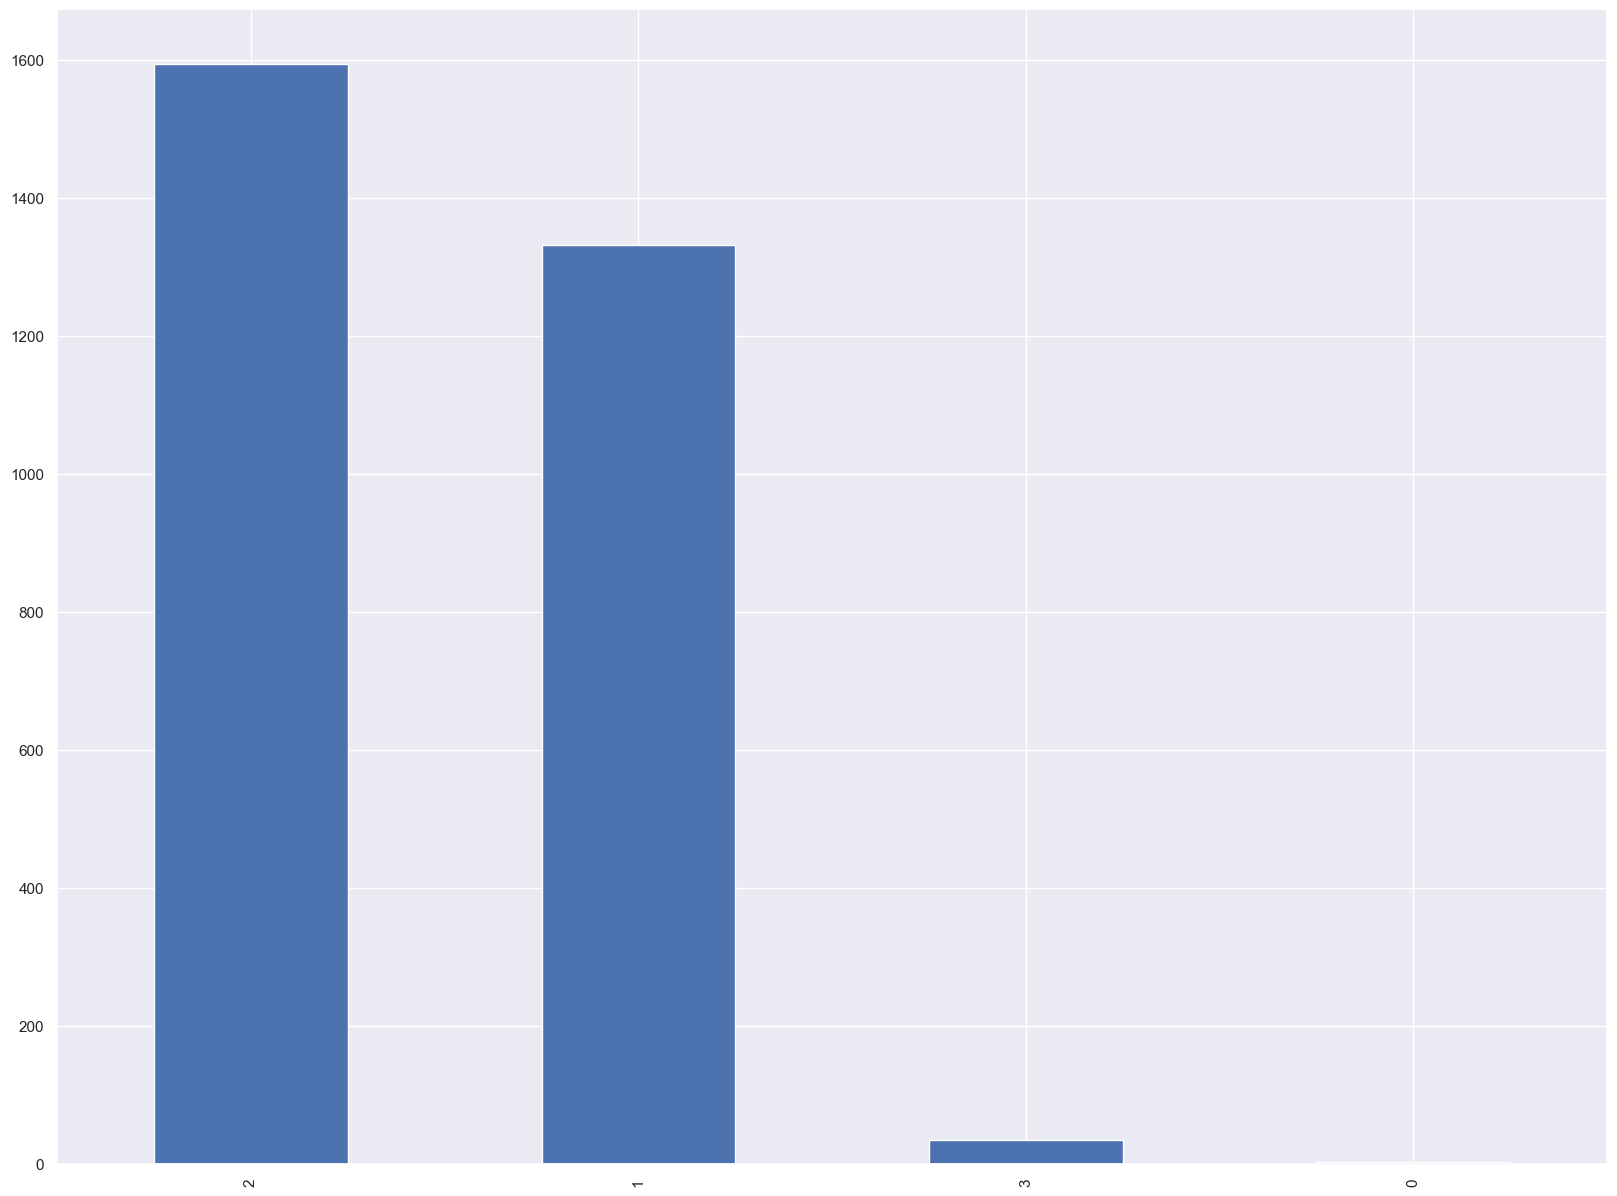

In [9]:
df['marital_status'].value_counts().plot(kind = 'bar')

> We have alot of columns with the same context but different numbering. Let's find out on whats different between those numberings and check the values. First we're going to look at the `repayment statuses` of users between April and September:

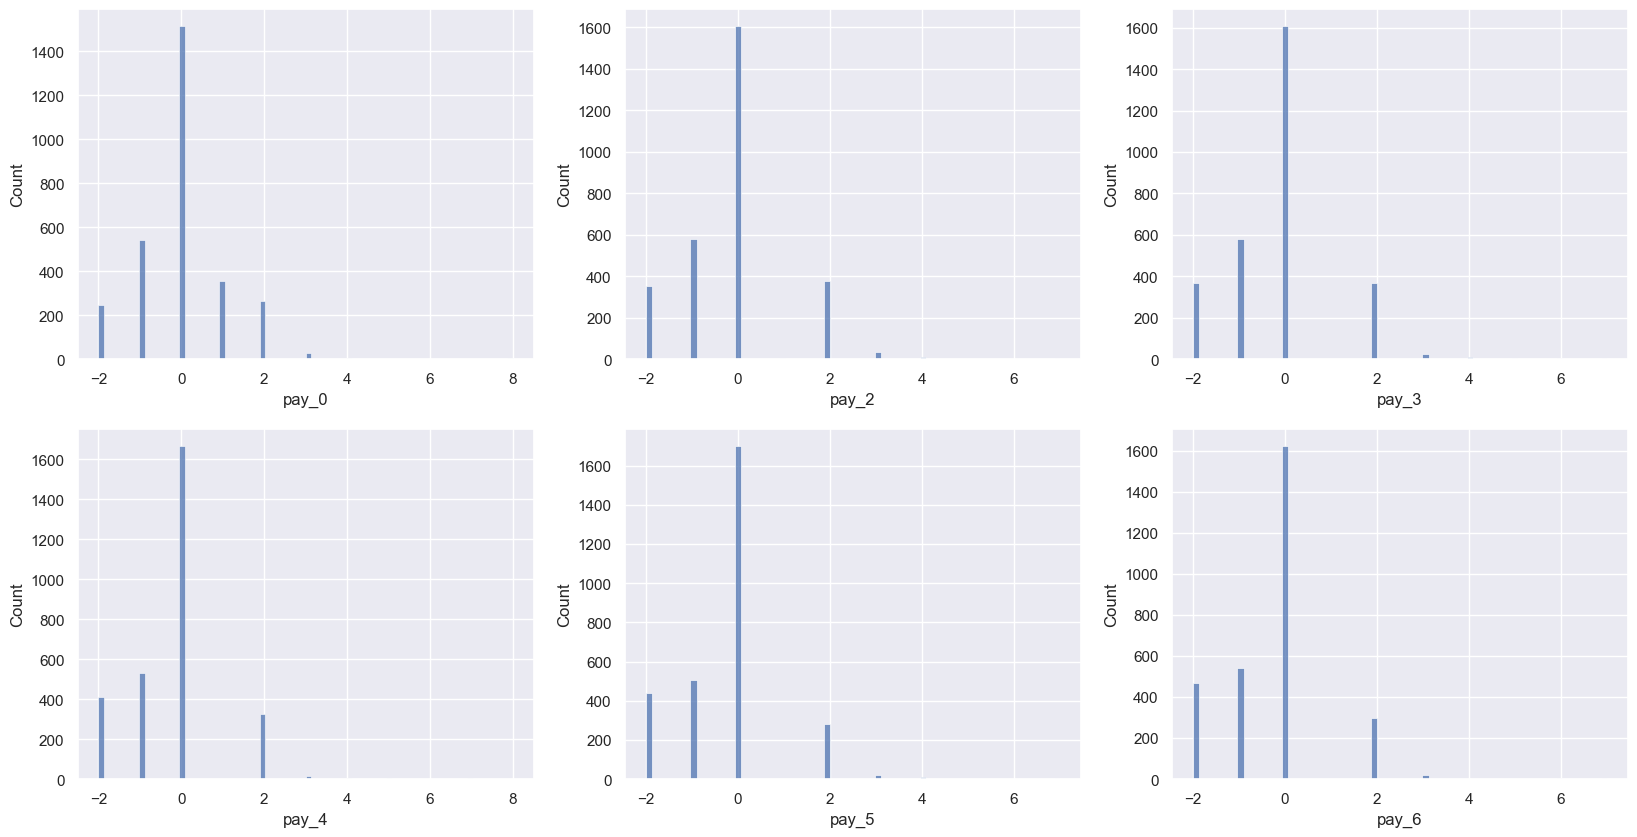

In [10]:
# Exploring the repayment status from april to september
pay = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))
x=0
for i in range(2):
  for j in range(3):
    try:
      sns.histplot(df[pay[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

From our plot above, there are some interesting insights we can summarize:
1. There are a non defined values from each columns, which is `-2`. This value isn't categorized if we looked our dataset description. So **we'll handle them later**
2. from 6 month ranging between april to september, we saw that the majority of users paid duly in time.

> Next is we want to see all the amount of bill statement from our dataframe:

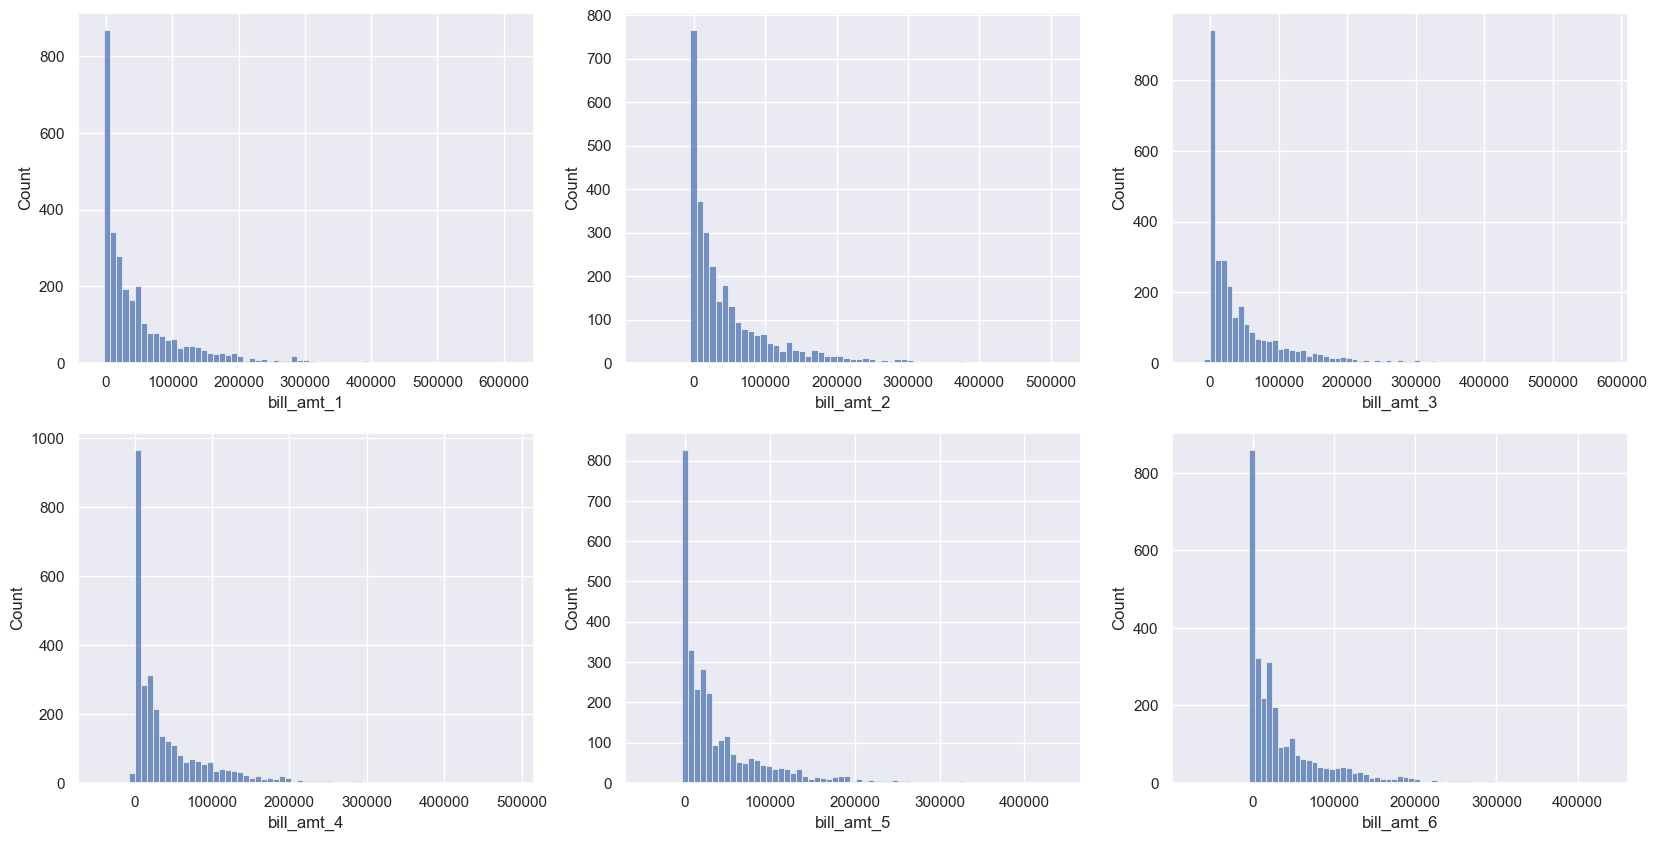

In [11]:
# Exploring the amount of bill statement from april to september
bill_amt_eda = ['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))
x=0
for i in range(2):
  for j in range(3):
    try:
      sns.histplot(df[bill_amt_eda[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

In [12]:
df[bill_amt_eda].value_counts()

bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  bill_amt_5  bill_amt_6
0           0           0           0           0           0             86
390         390         390         390         390         390            4
2400        2400        2400        2400        2400        2400           4
2500        2500        2500        2500        2500        2500           3
396         396         396         396         396         396            3
                                                                          ..
10827       11657       8428        9440        11863       10620          1
10833       14446       7609        4991        3400        3745           1
10834       11771       12762       12769       13512       14772          1
10878       12910       990         0           1715        11936          1
613860      512526      334227      145482      125936      91382          1
Length: 2868, dtype: int64

From the above visualization and count of unique values, the `bill_amt_` column are just some of the amount of bill statements in between months

Next we are curious to see what the previous amount of payments means in the `pay_amt_` columns :

In [13]:
# Exploring the previous amount of payments from april to september
pay_amt_eda = ['pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']
df[pay_amt_eda].value_counts()

pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6
0          0          0          0          0          0            134
2000       2000       2000       2000       2000       2000           4
1000       0          0          0          0          0              3
390        390        390        390        390        390            3
3000       2000       2000       2000       2000       2000           2
                                                                   ... 
1658       1601       1587       1310       1510       2000           1
1663       4777       1763       2445       2727       17136          1
1666       3597       76552      100566     0          0              1
1668       1283       853        1000       758        475            1
493358     1227082    164577     510        6239       4550           1
Length: 2813, dtype: int64

We can't really make a conclusion from the value that lies in the columns. But based on the data description from the dataset, it's the amount of previous payments made in each months.

> Let's see if age effects the defaulting in payments shown in our plot below :

<AxesSubplot:xlabel='age', ylabel='count'>

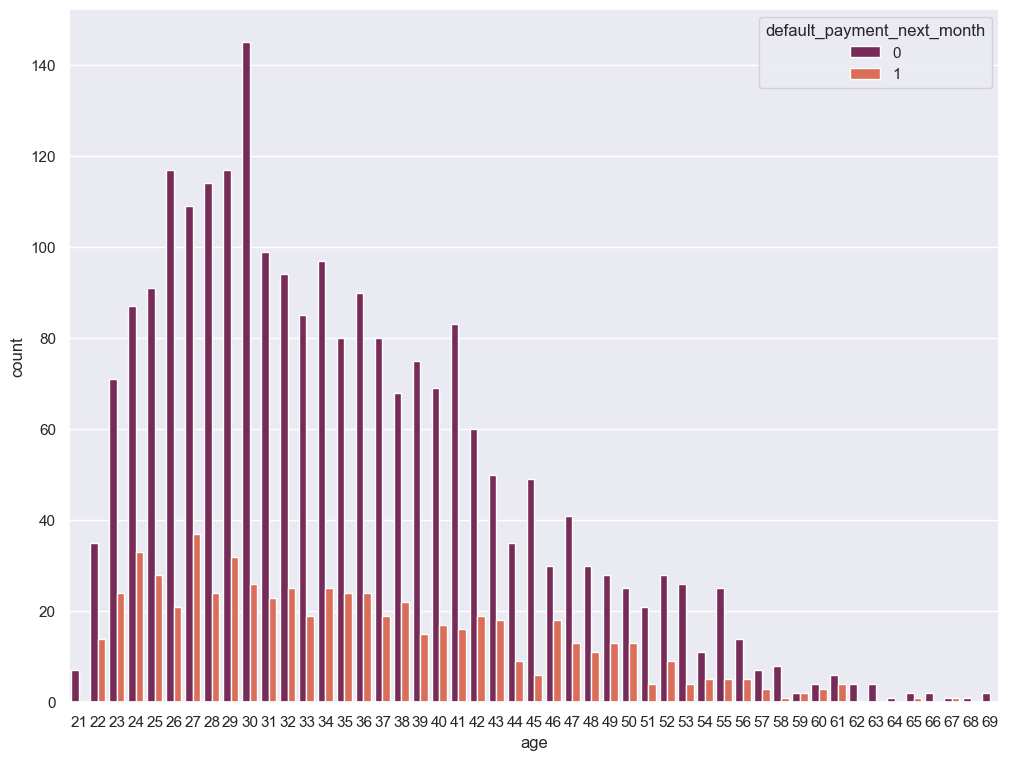

In [14]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(data=df, x = 'age', hue = 'default_payment_next_month', palette = 'rocket')

From our plot above, we saw that the `non - defaulted` category (`0`) is dominated by the range age of 25 - 30. Meanwhile we saw a decrease in `defaulted` (`1`) as the age progresses. So in conclusion, the `non - defaults` has a higher margin than the `defaulted`.

Next, we are going to see the education level of users, and check the categories within that column :

<AxesSubplot:xlabel='education_level', ylabel='count'>

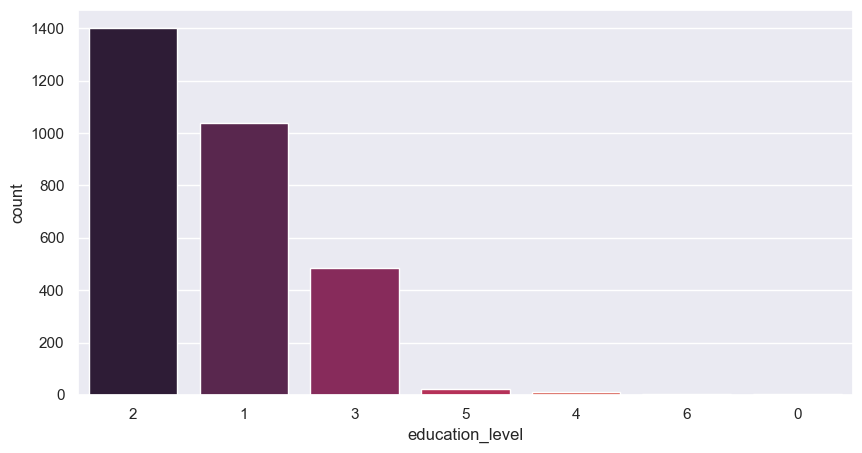

In [15]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data=df,x = 'education_level', order = df['education_level'].value_counts().index,palette='rocket')

Here we saw some odd numbers of category in this column. From the data description the `5` and `6` are categorized as unknown. So we want to handle them later

Then we want to find out our target or objectives in this project which is `default_payment_next_month` :

<AxesSubplot:>

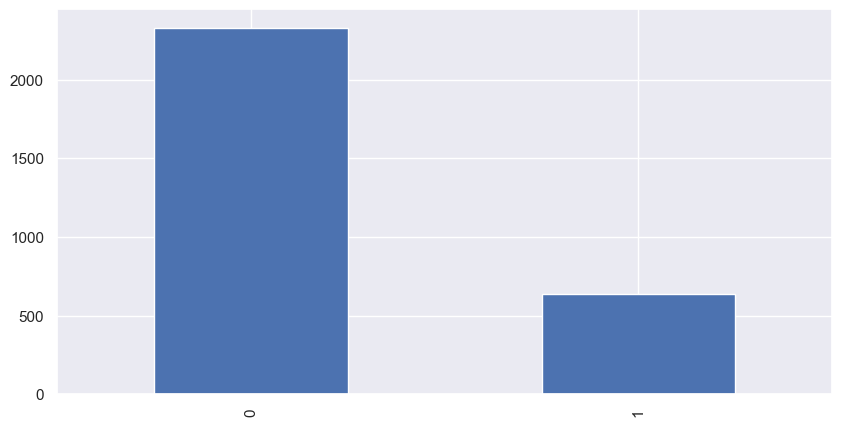

In [16]:
df['default_payment_next_month'].value_counts().plot(kind='bar')

Here we saw there is an imbalance proportions within our target label `default_payment_next_month`. If we look at our data description, we have alot of `non - default` (`0`) data compared to the `default` (`1`) data.

## **DATA CLEANING**

> In this section we want to perform some cleaning and manipulation in our data so our data could be handled accordingly in the next sections.

### **DATA MANIPULATION**

#### Renaming **pay_0** and **default_payment_next_month**

First, we want to rename the `pay_0` column so they could match the others and not make us confused later. And we also want to rename the `default_payment_next_month` into something simpler:

In [17]:
df.rename(columns={
    'pay_0':'pay_1',
    'default_payment_next_month':'default'
}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   limit_balance    2965 non-null   int64
 1   sex              2965 non-null   int64
 2   education_level  2965 non-null   int64
 3   marital_status   2965 non-null   int64
 4   age              2965 non-null   int64
 5   pay_1            2965 non-null   int64
 6   pay_2            2965 non-null   int64
 7   pay_3            2965 non-null   int64
 8   pay_4            2965 non-null   int64
 9   pay_5            2965 non-null   int64
 10  pay_6            2965 non-null   int64
 11  bill_amt_1       2965 non-null   int64
 12  bill_amt_2       2965 non-null   int64
 13  bill_amt_3       2965 non-null   int64
 14  bill_amt_4       2965 non-null   int64
 15  bill_amt_5       2965 non-null   int64
 16  bill_amt_6       2965 non-null   int64
 17  pay_amt_1        2965 non-null   int64
 18  pay_amt_

From the `.info()` we can see that our renaming has taken effect. Let's go to our next data cleaning.

#### **marital_status** Manipulation

First, we want to manipulate our `marital_status` column values. Earlier, we spotted an odd `0` value that has no categorization at all. So as seen in our code below we are going to replace the `0` and merging it with the others category (`3`), since we dont know the context of the data at all:

In [18]:
df['marital_status'] = df['marital_status'].replace([0],3)
df['marital_status'].value_counts()

2    1594
1    1332
3      39
Name: marital_status, dtype: int64

Here we saw that our changes has been applied in our `marital_status` column. The `0` index that has a count of 4 has been merged with the `3` (`Others`) category.

#### **education_level** manipulation

Here we want to do some manipulation on the `education_level` after we saw some odd things on why there are `5` and `6` categories in this column. So in this manipulation section, we want to merge this `5` and `6` category into the `4` (`Others`) category as seen in our code below :

In [19]:
df['education_level'] = df['education_level'].replace([5,6],4)
df['education_level'].value_counts()

2    1400
1    1039
3     483
4      41
0       2
Name: education_level, dtype: int64

Turns out we also have an `0` value which it isn't identified in the category. We want to do the same as our previous code and merging it with the `4` (`Others`):

In [20]:
df['education_level'] = df['education_level'].replace([0],4)
df['education_level'].value_counts()

2    1400
1    1039
3     483
4      43
Name: education_level, dtype: int64

Here we see that our changes has taken effect and now that we're happy, off to the next cleaning section.

#### **pay_** Columns Value Replacement 

We saw some non defined values from each pay_ columns, which is `-2`. This value isn't categorized if we looked our dataset description. So here we want to manipulate the values of `-2` and `-1` into the pay duly category (`0`):

In [21]:
df['pay_1'] = df['pay_1'].replace([-2,-1], 0)
df['pay_2'] = df['pay_2'].replace([-2,-1], 0)
df['pay_3'] = df['pay_3'].replace([-2,-1], 0)
df['pay_4'] = df['pay_4'].replace([-2,-1], 0)
df['pay_5'] = df['pay_5'].replace([-2,-1], 0)
df['pay_6'] = df['pay_6'].replace([-2,-1], 0)

In [22]:
replaced_pay = pd.DataFrame(df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']])
for i in replaced_pay:
    print(replaced_pay[i].value_counts())
    print('=='*20)

0    2303
1     356
2     262
3      29
4       7
8       3
5       2
7       2
6       1
Name: pay_1, dtype: int64
0    2540
2     374
3      32
4       8
1       4
7       3
6       2
5       2
Name: pay_2, dtype: int64
0    2557
2     368
3      22
4       8
6       4
5       3
7       3
Name: pay_3, dtype: int64
0    2607
2     324
3      14
4       7
7       6
5       5
6       1
8       1
Name: pay_4, dtype: int64
0    2647
2     280
3      19
4       9
7       7
5       2
6       1
Name: pay_5, dtype: int64
0    2636
2     297
3      21
7       6
6       3
4       2
Name: pay_6, dtype: int64


### **DATA CLEANING**

Then, after manipulating, we check if there are any missing values in our dataframe:

In [23]:
df.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
default            0
dtype: int64

Turns out there is no missing value in this dataframe, lets see other common missing values as usual with our code below :

In [24]:
#checking other common missing values
miss_vals = {}

for i in list(df.columns):
    miss_vals[i] = 0
    for j in df[i]:
        if j in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss_vals[i] = miss_vals[i] + 1
miss_vals

{'limit_balance': 0,
 'sex': 0,
 'education_level': 0,
 'marital_status': 0,
 'age': 0,
 'pay_1': 0,
 'pay_2': 0,
 'pay_3': 0,
 'pay_4': 0,
 'pay_5': 0,
 'pay_6': 0,
 'bill_amt_1': 0,
 'bill_amt_2': 0,
 'bill_amt_3': 0,
 'bill_amt_4': 0,
 'bill_amt_5': 0,
 'bill_amt_6': 0,
 'pay_amt_1': 0,
 'pay_amt_2': 0,
 'pay_amt_3': 0,
 'pay_amt_4': 0,
 'pay_amt_5': 0,
 'pay_amt_6': 0,
 'default': 0}

> From the loop of common missing values above, we can assure that there is still no missing value within our dataframe.

Now we are going to see if we have any data duplicates in our dataframe :

In [25]:
#check data duplicates
duplicates = df[df.duplicated()]
duplicates

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
1754,200000,2,1,1,34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We still have some duplicates from our data, let's remove them as seen in our code below:

In [26]:
df.drop(duplicates.index, axis = 0,inplace = True)

We're going to check if the changes has taken effect :

In [27]:
df.shape

(2964, 24)

Our duplicate data has been deleted by checking the number of rows that's been reduced to `2964`

## **DATA SPLITTING**

Next, we want to split the data into `Train` and `Test` so we could make sure we have made a reliable model. Before splitting we want to take some samples from our data so we could test our finished model in the end of this project:

In [28]:
inference = df.sample(2)
inference

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
1470,150000,2,2,2,28,0,0,0,0,0,...,11478,7080,1651,2500,7500,11478,7080,1651,43600,0
2153,20000,2,1,2,25,0,0,0,0,0,...,640,0,0,0,855,640,0,0,2742,0


We are going to save this sample value into `'inference'` variable for us to use later. Then we are going to remove the inferenced data from our dataframe so it doesn't intervene when we're doing the data inference later in this section.

In [29]:
df = df.drop(inference.index, axis=0)

Next, we are going to define our features and target into X and y train and test, and adding our target into the y variable.

In [30]:
X = df.drop('default',axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=42)

Here on the parameters of the train test split, we want to use a test size of `25%`, meaning we have `75%` of train data, we also used the `stratify` parameter because our data is imbalanced. 

Then we checked our X and y train tests shape : 

In [31]:
print(f'X_train shape : ',X_train.shape)
print(f'X_test shape : ',X_test.shape)
print(f'y_train shape : ',y_train.shape)
print(f'y_test shape : ',y_test.shape)

X_train shape :  (2221, 23)
X_test shape :  (741, 23)
y_train shape :  (2221,)
y_test shape :  (741,)


## **EDA ANALYSIS FOR FEATURE SELECTION AND MODELLING**

> Now, in this section is we will explain further analysis of our data and select the features we think are important for our modelling.

After we split our data into train and tests, we want to group the `X_train` and `y_train` so we could progress and do some feature selections

In [32]:
df_new = pd.concat([X_train, y_train], axis = 1)
df_new.shape

(2221, 24)

Then we want to split our data into numerical and categorical data types :

In [33]:
#splitting our data into categorical and numerical
category = df_new[['default', 'sex', 'education_level', 'limit_balance', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].columns.to_list()
numerical = df_new[['age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].columns.to_list()

#showing the splitting results
print(f'=='*20,'Categorical Features','=='*20)
print(category)
print('')
print(f'=='*20,'Numerical Features','=='*20)
print(numerical)

======================================== Categorical Features ========================================
['default', 'sex', 'education_level', 'limit_balance', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

======================================== Numerical Features ========================================
['age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


Here, we categorized some of the data that we think is a category rather than a numerical. The descriptions as :
1. `default` : default is the target that has a category of (`1` = Yes and `0` = No)
2. `sex` : obviously a category that has been encoded ordinally by the dataset (`1` = Male and `2` = Female)
3. `educational level` The education level of the person, here we did some manipulation earlier in our data cleaning so the category is as follows ((`1`= Graduate school, `2` = University, `3` = High school, `4` = Others)
4. `limit_balance` : Amount of given credit in NT dollars (includes individual and family/supplementary credit
5. `marital_status` : The status of mariage (`1` = Married, `2` = Single, `3` = Others)
6. `pay_ columns` : We manipulated this columns earlier, so the order is as follows : (`0` = Pay duly, `1` = Payment delay for one month, 2 = Payment delay for two months, etc..)

And then we grouped the rest as **numerical categories**.

Then we want to check if our splitted columns is the same as our previous dataframe:

In [34]:
# Check if there are any missing total splitted categorical and numerical data from our dataframe 
TotalSplitColumns = df_new[category + numerical]
print(f'Total Columns :', len(TotalSplitColumns.axes[1]))

Total Columns : 24


Now it looks good, we have splitted our data into two different data types and it's time to analyze them further.

### **NUMERICAL FEATURES ANALYSIS**


Let's see our descriptive values on our numerical column :

In [35]:
#looking at our descriptive values
df_new[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
age,2221.0,35.361999,9.157406,21.0,28.0,34.0,41.0,69.0
bill_amt_1,2221.0,52516.769923,73177.894537,-11545.0,4034.0,24050.0,70537.0,613860.0
bill_amt_2,2221.0,51312.099955,72100.959543,-9850.0,3423.0,22704.0,68083.0,512650.0
bill_amt_3,2221.0,49106.283656,69781.721947,-25443.0,3239.0,21429.0,63527.0,578971.0
bill_amt_4,2221.0,45034.986493,62856.146545,-46627.0,2700.0,20085.0,60990.0,485249.0
bill_amt_5,2221.0,41827.251688,59288.085422,-46627.0,2000.0,19084.0,54231.0,441981.0
bill_amt_6,2221.0,40521.599280,58108.137809,-73895.0,1479.0,18586.0,53316.0,424592.0
pay_amt_1,2221.0,6460.707789,21787.403906,0.0,1019.0,2264.0,5318.0,493358.0
pay_amt_2,2221.0,6446.910851,32374.255268,0.0,1000.0,2200.0,5000.0,1227082.0
pay_amt_3,2221.0,5400.856821,15260.431687,0.0,501.0,2000.0,4500.0,199209.0


There are minus values within the `bill_amt_` columns. But it's reasonable because that columns states the Amount of bill statements.

#### **NUMERICAL FEATURES HANDLING**

In our code below, we want to find out our multicollinearity within our columns using the variance inflation factor (`VIF`) :

In [36]:
#Grouping numerical features
vif_nums = ['age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
#finding correlation between features
def calc_vif(vif_cap):

    X = df_new[vif_cap]
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# compute vif 
calc_vif(vif_nums).sort_values('VIF', ascending=False)

,Variable,VIF
2,bill_amt_2,39.278807
5,bill_amt_5,38.002663
4,bill_amt_4,32.802308
3,bill_amt_3,25.314056
1,bill_amt_1,24.365486
6,bill_amt_6,21.981958
7,pay_amt_1,2.630018
9,pay_amt_3,1.913718
8,pay_amt_2,1.851997
0,age,1.693605


Here we saw a high multicollinearity within our data. We chose to **keep them** as they are **all needed**, because each column with the numbering represents the month of each context.

> Since this data is about the defaulting in credit cards, and we think we don't need to find the distribution because there has to be variations within the data, we choose not to <mark>handle anything</mark> even <mark>handling outliers.</mark>

Here we want to see one of the representations from the `bill_amt_1` so we could take a short summary of the amount of bill statement to the age of the people:

<AxesSubplot:ylabel='age'>

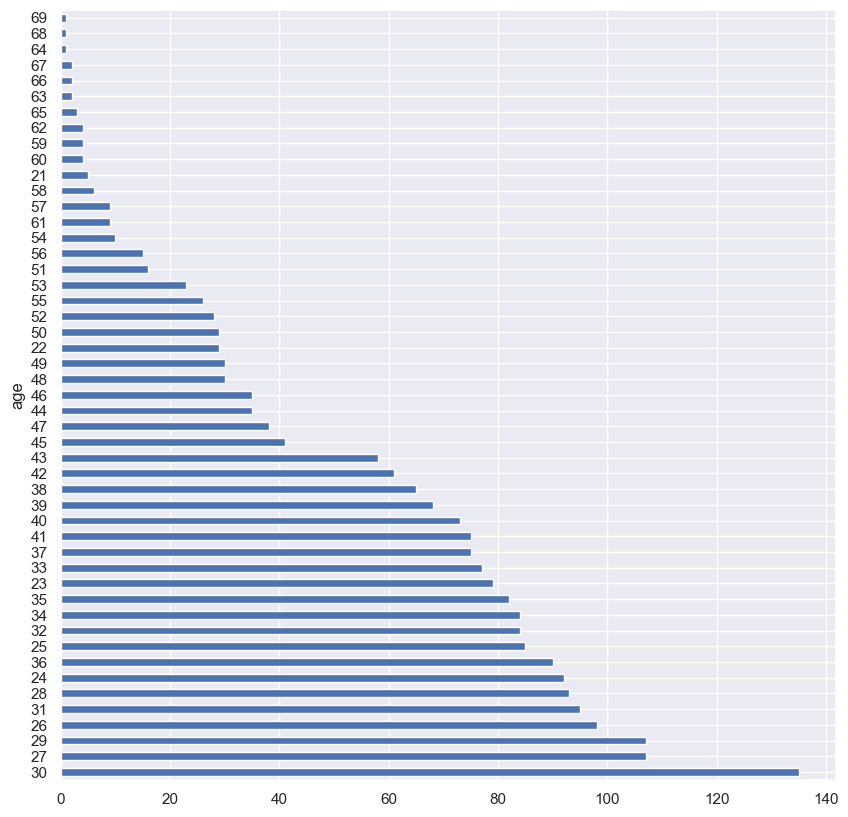

In [37]:
plt.rcParams["figure.figsize"] = [10, 10]
df_new.groupby(df_new['age']).count()['bill_amt_1'].sort_values(ascending = False).plot(kind='barh')

From our plot above we could conclude from the `bill_amt_1` that the amount of bill statements decreases by age. A people aged `30` has the highest bill and it decremently decreases as the age progresses.

In this code below is we want to find our feature correlations with our target label (`default`). From this heatmap we're going to split the features we wanted so we could get the perfect results for our model:

<AxesSubplot:>

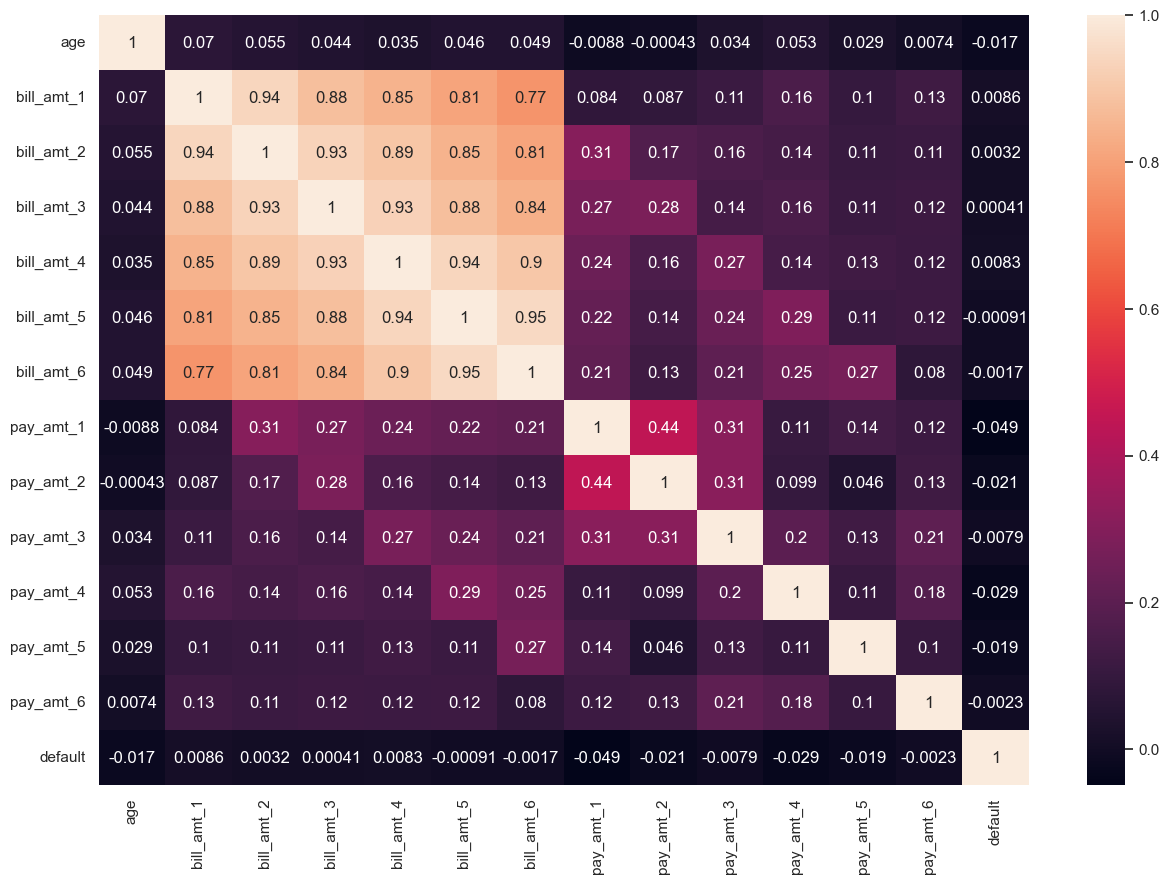

In [38]:
# Correlation between numerical and the target label
num_corr = pd.concat([df_new[numerical].reset_index(drop=True),df['default']],axis = 1)
plt.figure(figsize=(15,10))
sns.heatmap(num_corr.corr(),annot=True)

> From our heatmap above, we could conclude that none of the numerical feature has a correlation to our target (`default`). But based on personal judgement we still need the `age` feature because in our opinion age does have an impact whether the credit card will be defaulted or not. And from our previous analysis, as the age progresses the less likely that the credit card will be defaulted. `Age` does also does have an important role at determining future prediction and is the standard of people who wants to apply for a credit card.

Then we filter our selected features and assigning it to a new variable as seen in our code below :

In [39]:
#assigning a variable to our filtered features
df_cleaned = df_new['age']
df_cleaned

582     35
207     33
233     46
1466    33
1105    25
        ..
1578    45
2019    33
411     26
722     25
2178    30
Name: age, Length: 2221, dtype: int64

### **CATEGORICAL FEATURES ANALYSIS**


> Next is we want to analyze our categorical features. In our code below we assign our categorical data into a new dataframe variable:

In [40]:
df_cat = df_new[category]
df_cat.head()


,default,sex,education_level,limit_balance,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
582,0,2,2,260000,1,0,0,0,0,0,0
207,0,1,2,320000,1,0,0,0,0,0,0
233,0,1,1,80000,1,0,0,0,0,0,0
1466,0,2,1,420000,2,0,0,0,0,0,0
1105,0,2,3,50000,2,0,0,0,0,0,0


Now we know we have an categorical dataframe, it's time to find out the number of unique values using our code as below :

In [41]:
for i in df_cat:
    print(f'{i} : {df_cat[i].unique()}')
    print(f'')
    print(f'{i} total unique values : {df_cat[i].nunique()}')
    print('=='*20)

default : [0 1]

default total unique values : 2
sex : [2 1]

sex total unique values : 2
education_level : [2 1 3 4]

education_level total unique values : 4
limit_balance : [260000 320000  80000 420000  50000  30000 200000 140000 170000 160000
 330000  20000 130000 240000  60000 300000 100000 500000 180000 290000
 360000  90000 380000 150000 210000 440000  70000 120000 250000 270000
 350000 110000 480000 310000 410000 390000 220000  40000 230000 280000
 470000 370000 530000 400000 510000 450000 750000 460000 430000  10000
 340000 190000 490000 700000 560000 780000 620000 800000]

limit_balance total unique values : 58
marital_status : [1 2 3]

marital_status total unique values : 3
pay_1 : [0 1 2 4 3 6 8 7]

pay_1 total unique values : 8
pay_2 : [0 2 3 5 7 6 4 1]

pay_2 total unique values : 8
pay_3 : [0 2 3 7 4 6 5]

pay_3 total unique values : 7
pay_4 : [0 2 3 7 5 6 4]

pay_4 total unique values : 7
pay_5 : [0 2 3 7 4 6 5]

pay_5 total unique values : 7
pay_6 : [0 2 3 7 6 4]

pay_6

Based on the unique values within each feature we have some insights :
- As we stated earlier, the `default` has a binary value (`0` and `1`) where `1` states default and `0` states not default
- the `pay_` feature columns states the payment delay of people, `0` states pay duly meanwhile an ascending `1` and so on states on how many months does the borrower paid late
- We are interested in finding out the `limit_balance` and pairing it up with our target `default` and others.


As we elaborate on the above insights, we want to find out does `limit_balance` affects **defaulting in users**, in our plot below is how we find out:

<AxesSubplot:xlabel='default'>

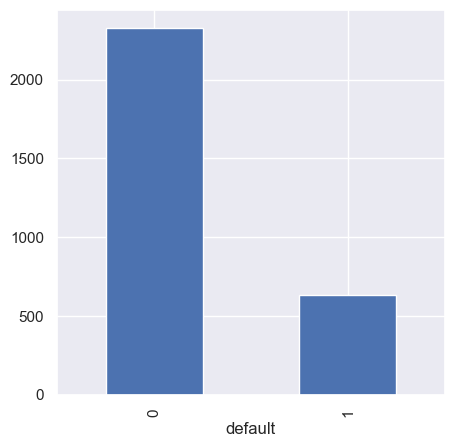

In [42]:
# finding out default total count with limit_balance  
plt.rcParams["figure.figsize"] = [5, 5]
df.groupby(['default']).count()['limit_balance'].plot(kind='bar')

> Based on our above plot, we can conclude that the `lower limit balance` has a **higher chance of defaulting** than the `higher limit balance` that is most likely to pay duly. 

Next we want to find correlation in categorical features with our target label `default` using our code below:

<AxesSubplot:>

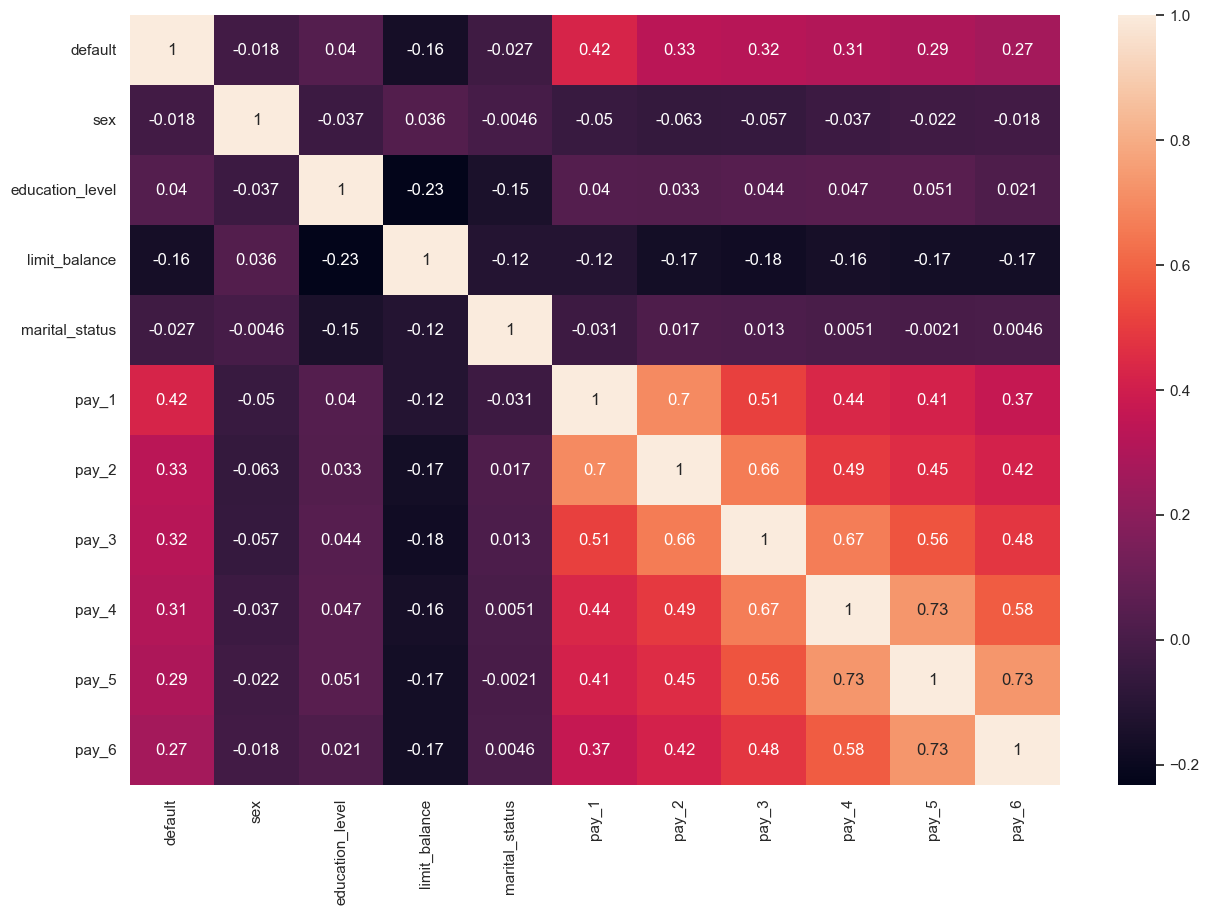

In [43]:
#categorical data heatmap with target
plt.figure(figsize=(15,10))
sns.heatmap(df_cat.corr(),annot=True)

> From our heatmap correlation above, we could intepret and add some insights based on our intuition :

- Even though it has a little correlation with our target, `marriage status` (`marital_status`) does influence one to apply for a credit.
- `education_level` does have an impact in a banks perspective of determining if someone is eligible to apply for a credit card and the chances of the said borrower candidate whether they'll default or not.
- repayment status in `pay_1 - pay_6` have an important role in determining if someone paid duly, or late.
- `sex` is also important because based on the gender, the bank could determine if he/she has the ability to pay duly, there are tendencies that the borrower could pay late. In our opinion, sex has the affect too in par with the `marital_status` and `education_level` on someone. For example let's say that the borrower candidate is a **male** and is **married** with the last education level of a **University graduate**, the bank accumulates the information and use that as a consideration whether to accept the borrowers request of applying a credit card.

**So based on our explanation above, we will choose all of the features because they needed each other**

> After selecting our features in numerical and categorical datas, we'll create a new dataframe and assigning our filtered features to a new variable:

In [44]:
# Filtering our numerical and categorical features
new_df = df_new[['default', 'sex', 'age', 'education_level', 'limit_balance', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
new_df.head()

,default,sex,age,education_level,limit_balance,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
582,0,2,35,2,260000,1,0,0,0,0,0,0
207,0,1,33,2,320000,1,0,0,0,0,0,0
233,0,1,46,1,80000,1,0,0,0,0,0,0
1466,0,2,33,1,420000,2,0,0,0,0,0,0
1105,0,2,25,3,50000,2,0,0,0,0,0,0


### **NUMERICAL SCALING**

After selecting our features, it's time to scale our numerical datas. Something important to note that we only need to scale `limit_balance` and `age` because it has a high value and the order doesn't match with the other features, that's not good for some of our model. So we'll do the scaling on the said features:

In [45]:
num_vals = ['age','limit_balance']
scaler = MinMaxScaler()

scaled_num = pd.DataFrame(scaler.fit_transform(new_df[num_vals]))
scaled_num.columns = num_vals

new_df.drop(num_vals, axis = 1, inplace=True)
new_df = pd.concat([new_df.reset_index(drop=True),scaled_num], axis = 1)

new_df.head()

,default,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,age,limit_balance
0,0,2,2,1,0,0,0,0,0,0,0.291667,0.316456
1,0,1,2,1,0,0,0,0,0,0,0.250000,0.392405
2,0,1,1,1,0,0,0,0,0,0,0.520833,0.088608
3,0,2,1,2,0,0,0,0,0,0,0.250000,0.518987
4,0,2,3,2,0,0,0,0,0,0,0.083333,0.050633


> For our scaling, we used the `MinMaxScaler` since we didn't handle the outliers and our data distribution between those features are skewed.

## **PREPROCESSING**

In this section, we'll prepare our test data for our modelling, first thing to do is we merge our two tests variables (`X_test` & `y_test`):

In [46]:
test = pd.concat([X_test,y_test], axis = 1)
test.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
2356,50000,2,2,1,49,0,0,0,0,0,...,32014,33573,29645,1613,2000,1500,2000,1645,1064,0
1975,150000,1,1,2,37,2,2,2,2,2,...,38687,37765,40352,1600,0,3300,0,3200,1700,1


Since we didnt handle any outliers nor do some feature engineering in our feature selection, we'll group the selected features we did before to our test data: 

In [47]:
# Filtering our numerical and categorical features for test data
test_new = test[['default', 'sex', 'age', 'education_level', 'limit_balance', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
test_new.head()

,default,sex,age,education_level,limit_balance,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
2356,0,2,49,2,50000,1,0,0,0,0,0,0
1975,1,1,37,1,150000,2,2,2,2,2,2,2
2493,0,1,27,2,240000,2,0,0,0,0,0,0
814,0,2,27,1,360000,2,0,0,0,0,0,0
382,1,1,34,2,80000,1,2,2,2,0,0,0


In our feature selection before, we do select the `age` and `limit_balance` features to be scaled, we'll do the same on our data tests: 

In [48]:
test_num_vals = ['age','limit_balance']

test_scaled_num = pd.DataFrame(scaler.transform(test_new[test_num_vals]))
test_scaled_num.columns = test_num_vals

test_new.drop(test_num_vals, axis = 1, inplace=True)
test_new = pd.concat([test_new.reset_index(drop=True),test_scaled_num], axis = 1)

test_new.head()

,default,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,age,limit_balance
0,0,2,2,1,0,0,0,0,0,0,0.583333,0.050633
1,1,1,1,2,2,2,2,2,2,2,0.333333,0.177215
2,0,1,2,2,0,0,0,0,0,0,0.125000,0.291139
3,0,2,1,2,0,0,0,0,0,0,0.125000,0.443038
4,1,1,2,1,2,2,2,0,0,0,0.270833,0.088608


Lastly, our cleaned data from train and tests are ready to be modeled, let's define them into a new variable X and y train tests:

In [49]:
X_train = new_df.drop('default',axis=1).copy()
y_train = new_df['default']

X_test = test_new.drop('default',axis=1).copy()
y_test = test_new['default']

## **MODEL DEFINITION**

Here we define our Models. The models we're going to use for this project are:
1. **Logistic Regression**
2. **Support Vector Machine (SVM)**
3. **Decision Tree**
4. **Random Forest**
5. **K - Nearest Neighbor (KNN)**
6. **Gaussian Naive Bayes (GaussianNB)**
7. **Gradient Boosting Classifier**

Then we'll choose the best model based on the **cross validation score** and tune the hyperparameters with `GridSearchCV`. In our code below is we define the models :

In [50]:
#Defining Logistic regression and assigning to a variable
logreg = LogisticRegression()
#Defining SVM and assigning to a variable
svc = SVC()
#Defining Decision Tree and assigning to a variable
dt = DecisionTreeClassifier()
#Defining Random Forest and assigning to a variable
rf = RandomForestClassifier()
#Defining KNN and assigning to a variable
knn = KNeighborsClassifier()
#Defining Gaussian Naive Bayes and assigning to a variable
nb = GaussianNB()
#Defining Gradient Boosting Classifier and assigning to a variable
gbc = GradientBoostingClassifier()

Here, we initialized all of the models without any parameters. And in our next line of code will show the cross validations for each models in search of **finding the best models** with no hyperparameters:

### **CROSS VALIDATION**

Now we want to cross validate each of the models in search of **finding our most consistent model** in terms of **mean** and **standard deviation** by the scoring `accuracy`. We use the `accuracy` scoring because we want to make sure that our cross validation between models are consistent across the overall state of data so we could get the best possible result by finding based on overall accuracy of our data. You can see our cross validations for each models below and **give some insights with a recap score of each model in the end**:

#### **LOGISTIC REGRESSION**

In [51]:
logreg_crossval = cross_val_score(logreg, 
                                           X_train, 
                                           y_train, 
                                           cv=3, 
                                           scoring='accuracy')

print('All - Cross Validation  : ', logreg_crossval)
print('Mean - Cross Validation : ', logreg_crossval.mean())
print('Std - Cross Validation  : ', logreg_crossval.std())
print('Range of Test-Set       : ', (logreg_crossval.mean()-logreg_crossval.std()) , '-', (logreg_crossval.mean()+logreg_crossval.std()))

All - Cross Validation  :  [0.82591093 0.83783784 0.83513514]
Mean - Cross Validation :  0.8329613013823541
Std - Cross Validation  :  0.0051060056489060915
Range of Test-Set       :  0.8278552957334481 - 0.8380673070312602


#### **SVM**

In [52]:
svc_crossval = cross_val_score(svc, 
                                           X_train, 
                                           y_train, 
                                           cv=3, 
                                           scoring='accuracy')

print('All - Cross Validation  : ', svc_crossval)
print('Mean - Cross Validation : ', svc_crossval.mean())
print('Std - Cross Validation  : ', svc_crossval.std())
print('Range of Test-Set       : ', (svc_crossval.mean()-svc_crossval.std()) , '-', (svc_crossval.mean()+svc_crossval.std()))

All - Cross Validation  :  [0.8340081  0.84054054 0.83243243]
Mean - Cross Validation :  0.8356603567129883
Std - Cross Validation  :  0.0035102540725871815
Range of Test-Set       :  0.8321501026404011 - 0.8391706107855755


#### **DECISION TREE**

In [53]:
dt_crossval = cross_val_score(dt, 
                                           X_train, 
                                           y_train, 
                                           cv=3, 
                                           scoring='accuracy')

print('All - Cross Validation  : ', dt_crossval)
print('Mean - Cross Validation : ', dt_crossval.mean())
print('Std - Cross Validation  : ', dt_crossval.std())
print('Range of Test-Set       : ', (dt_crossval.mean()-dt_crossval.std()) , '-', (dt_crossval.mean()+dt_crossval.std()))

All - Cross Validation  :  [0.74224022 0.73783784 0.7472973 ]
Mean - Cross Validation :  0.7424584503531871
Std - Cross Validation  :  0.003864890081723906
Range of Test-Set       :  0.7385935602714633 - 0.746323340434911


#### **RANDOM FOREST**

In [54]:
rf_crossval = cross_val_score(rf, 
                                           X_train, 
                                           y_train, 
                                           cv=3, 
                                           scoring='accuracy')

print('All - Cross Validation  : ', rf_crossval)
print('Mean - Cross Validation : ', rf_crossval.mean())
print('Std - Cross Validation  : ', rf_crossval.std())
print('Range of Test-Set       : ', (rf_crossval.mean()-rf_crossval.std()) , '-', (rf_crossval.mean()+rf_crossval.std()))

All - Cross Validation  :  [0.82321188 0.81351351 0.8       ]
Mean - Cross Validation :  0.8122417964523226
Std - Cross Validation  :  0.009518779447519596
Range of Test-Set       :  0.8027230170048031 - 0.8217605758998422


#### **KNN**

In [55]:
knn_crossval = cross_val_score(knn, 
                                           X_train, 
                                           y_train, 
                                           cv=3, 
                                           scoring='accuracy')

print('All - Cross Validation  : ', knn_crossval)
print('Mean - Cross Validation : ', knn_crossval.mean())
print('Std - Cross Validation  : ', knn_crossval.std())
print('Range of Test-Set       : ', (knn_crossval.mean()-knn_crossval.std()) , '-', (knn_crossval.mean()+knn_crossval.std()))

All - Cross Validation  :  [0.81511471 0.81216216 0.80675676]
Mean - Cross Validation :  0.8113445429234903
Std - Cross Validation  :  0.0034607533763892314
Range of Test-Set       :  0.8078837895471012 - 0.8148052962998795


#### **GAUSSIAN NAIVE BAYES**

In [56]:
nb_crossval = cross_val_score(nb, 
                                           X_train, 
                                           y_train, 
                                           cv=3, 
                                           scoring='accuracy')

print('All - Cross Validation  : ', nb_crossval)
print('Mean - Cross Validation : ', nb_crossval.mean())
print('Std - Cross Validation  : ', nb_crossval.std())
print('Range of Test-Set       : ', (nb_crossval.mean()-nb_crossval.std()) , '-', (nb_crossval.mean()+nb_crossval.std()))

All - Cross Validation  :  [0.78677463 0.81621622 0.8       ]
Mean - Cross Validation :  0.8009969483653695
Std - Cross Validation  :  0.012040132772053376
Range of Test-Set       :  0.7889568155933161 - 0.8130370811374229


#### **GRADIENT BOOSTING CLASSIFIER**

In [57]:
gbc_crossval = cross_val_score(gbc, 
                                           X_train, 
                                           y_train, 
                                           cv=3, 
                                           scoring='accuracy')

print('All - Cross Validation  : ', gbc_crossval)
print('Mean - Cross Validation : ', gbc_crossval.mean())
print('Std - Cross Validation  : ', gbc_crossval.std())
print('Range of Test-Set       : ', (gbc_crossval.mean()-gbc_crossval.std()) , '-', (gbc_crossval.mean()+gbc_crossval.std()))

All - Cross Validation  :  [0.83265857 0.82972973 0.82972973]
Mean - Cross Validation :  0.8307060096533782
Std - Cross Validation  :  0.0013806683086960646
Range of Test-Set       :  0.829325341344682 - 0.8320866779620743


#### **CROSS VALIDATION SUMMARY**

So to sum up, here's our recap of `cross validations` in each models :
- **Logistic Regression**
    - Mean : 0.83
    - Standard Deviation : 0.005   
- **SVM**
    - Mean : 0.83
    - Standard Deviation : 0.003
- **Decision Tree**
    - Mean : 0.74
    - Standard Deviation : 0.003
- **Random Forest**
    - Mean : 0.81
    - Standard Deviation : 0.009
- **KNN**
    - Mean : 0.81
    - Standard Deviation : 0.003
- **Gaussian Naive Bayes**
    - Mean : 0.80
    - Standard Deviation : 0.012
- **Gradient Boosting Classifier**
    - Mean : 0.83
    - Standard Deviation : 0.001

`We could've make a function and variables to show the results of each mean and standard deviations of the model, but we write this down instead so you'll follow along at reading each of our statements in this analysis.`

Based on the results of our cross validation, we saw that all models are consistent enough if we looked at the **standard deviation**. But if you see closer we'll choose `SVM` as our best model because it has a decent standard deviation with the highest average amongs the rest. Then we move on to the next section which is training our models

## **MODEL TRAINING**

As we stated above our reasoning in choosing the `SVM` model, now we'll start our data training and also calculating the computational time of our data training with `SVM`:

In [58]:
start = time.time()
svc.fit(X_train, y_train)
end = time.time()

print(f'Training Duration : {end-start} sec')

Training Duration : 0.20890021324157715 sec


It takes 0.2 seconds to train our X and y data which is quite fast

## **MODEL EVALUATION**

> In this section we'll evaluate our trained model and finding out the scores from our model in predicting the defaulting in credit cards:

First we're going to predict our trained model to predict the train and tests data : 

In [59]:
svc_pred_train = svc.predict(X_train)
svc_pred_test = svc.predict(X_test)
svc_pred_train

array([0, 0, 0, ..., 1, 0, 0])

Then let's see it's **classification report** in order to evaluate our model in predicting our train and test data:

In [60]:
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,svc_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,svc_pred_test,zero_division=0, target_names = target_names))

======================================== TRAINING ========================================
              precision    recall  f1-score   support

 Not Default       0.86      0.95      0.91      1745
     Default       0.72      0.45      0.55       476

    accuracy                           0.84      2221
   macro avg       0.79      0.70      0.73      2221
weighted avg       0.83      0.84      0.83      2221

======================================== TEST ========================================
              precision    recall  f1-score   support

 Not Default       0.86      0.96      0.91       582
     Default       0.74      0.43      0.54       159

    accuracy                           0.84       741
   macro avg       0.80      0.69      0.72       741
weighted avg       0.83      0.84      0.83       741



Before we give you some insights, let's focus on some values and see what the values in our classification report mean:
1. **Precision**    : Precision is a measure of how many of the positive predictions made are correct.
2. **Recall**       : Recall is a measure of how many of the positive cases the classifier correctly predicted,     over all the positive cases in the data.   
3. **F1 - Score**   : F1-Score is a measure combining both precision and recall. It's described as a harmonic mean of precision and recall
4. **Support**      : Support is the number of actual occurrences of the class in the specified dataset. It's where we see if we have an imbalanced data so we know which metrics to see and evaluate.

So after finding our the definitions, we are going to focus on the default class because it's our main objective in `predicting the defaulting in credit cards`. If we put it in the concepts of True Positive, True Negative, False Positive, and False Negative, we could intepret as follows :

`Positive Class`  : Default

`Negative Class` : Not Default

- `True Positive` : the classifier predicts default, in reality it is default
- `True Negative` : the classifier predicts not default, in reality it is no default
- `False Positive` : the classifier predicts default, in reality it is not defaulted
- `False Negative` : the classifier predicts not default, in reality it is defaulted

From the above concept, we want to focus on reducing on our `False Negatives`, since our False negative states **the classifier predicts not default, in reality it is defaulted**, so we're going to focus on the `recall` in our default class. We don't want our classifier to predict a people `paid duly` meanwhile `in the reality they paid late (defaulted)`, it's not good from a bankers perspective. It'll make the banks lose profit and confuse the audit team when doing a monthly report.

> So from our definition and explanations above, we could see that our data is **slightly best fitting** because we saw a consistent results between the train and test data. And we want to highlight closer at the `recall` in the `default` class which is `0.43` on the test data. It simply implies that  `out of all the data of the people to be identified as default, the model only predicted 43% of the identified default correctly.`

We wonder, if tuning does make an impact in our recall results. So we'll do some Hyperparameter tuning with **grid search** in order to minimize `False Negatives` by increasing the `recall` value :

### HYPERPARAMETER TUNING

In our code below, we put some combinations of hyperparameters and let the grid search find the best combinations for our model :

- For your information, we only used `2 kernels` out of the 5 available kernels due to it's **limitation to our hardware**.

So the end results of our grid search hyperparameters are :

In [61]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid']
            }
            
svc_tuned = GridSearchCV(estimator=SVC(probability=True),
                        param_grid=param_grid,
                        cv=10,
                        scoring='recall',
                        verbose=3)
svc_tuned.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.021 total time=   1.2s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.3s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.3s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.0s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.0s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.1s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.021 total time=   1.0s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.0s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.021 total time=   1.7s
[CV 1/10] END ...C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   1.1s
[CV 2/10] END ...C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='recall', verbose=3)

From our grid search above, there are some important thing you'll need to know :
- We defined a 10 time cross validation fold which implies that we're splitting our data into 10 subsets which our algorithm will check those subsets with all the features applied, so it's going to take a while for the algorithm to find the best combinations.
- Because our objective in tuning is we want to minimize the `False Negatives` by boosting up our `recall` value, we defined our scoring in grid search as `Recall`.

After the grid search **Has finished finding the best combination of hyperparameters**, it's time to see what the best parameters are :

In [62]:
svc_tuned.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}

We could see above that that combinations are the best for our model, let's see what our best estimator is:

In [63]:
svc_tuned.best_estimator_

SVC(C=100, gamma=0.001, kernel='sigmoid', probability=True)

And we want to see what the combinations best scores are : 

In [76]:
svc_tuned.best_score_

0.4243351063829787

Let's apply those hyperparameters into a new variable `svc2` and training our data with the new model:

In [73]:
svc2 = SVC(C=100, gamma = 0.001, kernel='sigmoid', probability = True)

start = time.time()
svc2.fit(X_train, y_train)
end = time.time()

print(f'Training Duration : {end-start} sec')

Training Duration : 0.9168577194213867 sec


**It took longer to compute than our previous training with no hyperparameters.** Next, we want to see if the newly applied hyperparameters could predict 43% of the identified people as default correctly :

In [74]:
svc2_pred_train = svc2.predict(X_train)
svc2_pred_test = svc2.predict(X_test)
svc2_pred_train

array([0, 0, 0, ..., 1, 0, 0])

`Here are before and afters of our model without and with tuning : `

In [77]:
print('Before Tuning : ')
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,svc_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,svc_pred_test,zero_division=0, target_names = target_names))
print('----'*20)
print('After Tuning : ')
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,svc2_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,svc2_pred_test,zero_division=0, target_names = target_names))

Before Tuning : 
======================================== TRAINING ========================================
              precision    recall  f1-score   support

 Not Default       0.86      0.95      0.91      1745
     Default       0.72      0.45      0.55       476

    accuracy                           0.84      2221
   macro avg       0.79      0.70      0.73      2221
weighted avg       0.83      0.84      0.83      2221

======================================== TEST ========================================
              precision    recall  f1-score   support

 Not Default       0.86      0.96      0.91       582
     Default       0.74      0.43      0.54       159

    accuracy                           0.84       741
   macro avg       0.80      0.69      0.72       741
weighted avg       0.83      0.84      0.83       741

--------------------------------------------------------------------------------
After Tuning : 
======================================== TRAINING ====

**The tests shows that the classifier predicted the correct people that was defaulted is still `43%` of all the default cases within the data**. So we saw no improvements at all within the tests data. But we saw a better consistent comparison in training and testing with the tuned hyperparameters meaning our data is more consistent and best fitting than the previous default model with no hyperparameters.

> So in conclusion we have no significant difference after tuning hence we could use the default defined models with no hyperparameters at all. And our model isn't good at all for predicting the default in people so the final statements are :`out of all the data of the people to be identified as default, the model only predicted 43% of the identified default correctly.`

## **MODEL INFERENCE**

In this section, we want to do the same behaviours as we did in our preprocessing

In [67]:
#Looking at our inferenced data
inference

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
1470,150000,2,2,2,28,0,0,0,0,0,...,11478,7080,1651,2500,7500,11478,7080,1651,43600,0
2153,20000,2,1,2,25,0,0,0,0,0,...,640,0,0,0,855,640,0,0,2742,0


Then we want to filter the features we used in our data preprocessing:

In [68]:
inference = inference[['default', 'sex', 'age', 'education_level', 'limit_balance', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
print(inference)

      default  sex  age  education_level  limit_balance  marital_status  \
1470        0    2   28                2         150000               2   
2153        0    2   25                1          20000               2   

      pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  
1470      0      0      0      0      0      0  
2153      0      0      0      0      0      0  


We do the same scaling as we did with the training and preprocessing :

In [69]:
num_vals_inf = ['age','limit_balance']

scaled_num_test = pd.DataFrame(scaler.transform(inference[num_vals_inf]))
scaled_num_test.columns = num_vals_inf

inference.drop(num_vals_inf, axis = 1, inplace=True)
inference = pd.concat([inference.reset_index(drop=True),scaled_num_test], axis = 1)

inference.head()

,default,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,age,limit_balance
0,0,2,2,2,0,0,0,0,0,0,0.145833,0.177215
1,0,2,1,2,0,0,0,0,0,0,0.083333,0.012658


For testing our predictions, we have to drop our target so our model later will predict the `default` in our inferenced data:

In [70]:
X_inf = inference.drop('default',axis=1).copy()

First, we predict the tuned hyperparameters of the SVM :

In [71]:
svc2.predict(X_inf)

array([0, 0])

Then we do the same with the default model with no parameters at all :

In [72]:
svc.predict(X_inf)

array([0, 0])

> Both results from the `svc` and `svc2` are the same. And this data inference section proves that our model is able to predict the default even though it's not accurately correct. 

## **CONCLUSIONS BASED ON OUR ANALYSIS**


**From our project of predicting the chance of default payments, we can conclude some things :**

1. We saw that majority of user genders are female in the ages of `21 - 69`. With active majority peaking at the age of `42`. So in conclusion saw a substantial difference in genders and ages, with the male peaking earlier in age which is `30` and dominated by female users.

2. In our Exploratory Data Analysis, we saw there is an imbalance proportions within our target label `default_payment_next_month`. If we look at our data description, we have alot of `non - default` (`0`) data compared to objectives of this project which is the `default` (`1`) data. We also saw that the `non - defaulted` category (`0`) is dominated by the range age of 25 - 30. Meanwhile we saw a decrease in `defaulted` (`1`) as the age progresses. So in conclusion, the `non - defaults` has a higher margin than the `defaulted`.

3. We found out that the `lower limit balance` has a **higher chance of defaulting** than the `higher limit balance` that is most likely to **pay duly**. 
 
4. We have done some manipulations within some of the candidate features earlier in our cleaning section, those features are : `marital_status` and `education_level`, and also renaming our `pay_0` and our target label to ease us in calling that feature later.

5. In our feature selection, we selected some features as explained below : 
 - Even though it has a little correlation with our target, `marriage status` (`marital_status`) does influence one to apply for a credit.
- `education_level` does have an impact in a banks perspective of determining if someone is eligible to apply for a credit card and the chances of the said borrower candidate whether they'll default or not.
- repayment status in `pay_1 - pay_6` have an important role in determining if someone paid duly, or late.
- `sex` is also important because based on the gender, the bank could determine if he/she has the ability to pay duly, there are tendencies that the borrower could pay late. In our opinion, sex has the affect too in par with the `marital_status` and `education_level` on someone. For example let's say that the borrower candidate is a **male** and is **married** with the last education level of a **University graduate**, the bank accumulates the information and use that as a consideration whether to accept the borrowers request of applying a credit card.
- `age` does also plays an important role because in our opinion age does have an impact whether the credit card will be defaulted or not. And from our previous analysis, as the age progresses the less likely that the credit card will be defaulted. `Age` does also does have an important role at determining future prediction and is the standard of people who wants to apply for a credit card.

6. We have 7 models as the candidate best model for our data. We cross validate each of the models in search of **finding our most consistent model** in terms of **mean** and **standard deviation** by the scoring `accuracy`. We use the `accuracy` scoring because we want to make sure that our cross validation between models are consistent across the overall state of data so we could get the best possible result by finding based on overall accuracy of our data. And the results of our cross validation, we saw that all models are consistent enough if we looked at the **standard deviation**. But if you see closer we'll choose `SVM` as our best model because it has a decent standard deviation with the highest average amongs the rest.

7. The training of our `SVM` model with no parameters is 0.2 second meanwhile the tuned `SVM` model took longer to compute in 0.91 seconds than our previous training with no hyperparameters.

8. In this project, we are going to focus on the default class because it's our main objective in `predicting the defaulting in credit cards`. So we are focusing on reducing on our `False Negatives`, since our False negative states **the classifier predicts not default, in reality it is defaulted**, so we're going to focus on the `recall` in our default class. We don't want our classifier to predict a people `paid duly` meanwhile `in the reality they paid late (defaulted)`, it's not good from a bankers perspective. It'll make the banks lose profit and confuse the audit team when doing a monthly report.

9. From our predictions with the `SVM` model with **no hyperparameters**, we could see that our data is **slightly best fitting** because we saw a consistent results between the train and test data. And we want to highlight closer at the `recall` in the `default` class which is `0.43` on the test data. In an easier narrative manner, `out of all the data of the people to be identified as default, the model only predicted 43% of the identified default correctly.` So we want to tune our hyperparameters in hopes of boosting the recall value and minimalizing `False Negatives`.

10. Then after we tuned the hyperparameters, it shows that the classifier predicted the correct people that was defaulted is still `43%` of all the default cases within the data. There are no improvements at all within the tests data. But we saw a better consistent comparison in training and testing with the tuned hyperparameters meaning our data is more consistent and best fitting than the previous default model with no hyperparameters. 

11. **Our model isn't good at all for predicting the default in people even after tuning**. This is because our data **isn't imbalanced between the categories within the targets**. This could be avoided by doing some oversampling or undersampling so our data is balanced for training, and hopefully gain better results.

12. The **DATA INFERENCE** section shows that though our model can't identify whether a person defaulted or not, it's still able to predict and the results coincidently are correct.



## **CONCEPTUAL PROBLEMS**

#### 1. Apakah fungsi parameter `criterion` pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Criterion parameter is a method we will choose when performing split operations. Because decision tree concept are partitions, it's very important in determining how and when to split. There are several concepts, explained as below:

<h3>Entropy</h3>
- Entropy is a measure of the disorder of a system. In the case of data science, it's the measure of impurity in a split. Splitting with less entropy ensures optimum results. Splitting with less entropy ensures optimum results. Entropy ranges from 0 to 1. If entropy is 0, consider it as a pure sub-tree and entropy becomes 1 if all labels are equally distributed in a leaf

<h3>Information Gain</h3>
- Information gain measures the quality of the split. It learns how much we have reduced the entropy when we make a split.

<h3> Gini</h3>
- Another method is **Gini** impurity. It also measures the purity of a partition in a different mechanism. Entropy value varies between 0 and 1, but Gini ranges between 0 and 0.5. Because the different calculation mechanism in Gini compared to Entropy, computation power is reduced due to the **Gini** doesnt calculate log function as opposed to **Entropy**. So in the case of where solving time needed to be fast, **Gini** is more preferrable.

#### 2. Apakah fungsi dari `pruning` pada Tree model?



Decision Trees are prone to over-fitting. A decision tree will always overfit the training data if we allow it to grow to its max depth, so `Pruning` comes in handy. Pruning is a technique that is used to reduce overfitting. Pruning also simplifies a decision tree by removing the weakest rules. `Pruning` is categorized into two segments :

<h3>Pre - Pruning</h3>
- Pre - Pruning stops the tree before it has completed classifying the training set 

<h3> Post - Pruning</h3>
- Post - Pruning allows the tree to classify the training set perfectly and then prunes the tree.

Pruning begins with an unpruned tree, takes a sequence of pruned trees and lastly finding the best one through cross validation. There are somethings to take account when using pruning on decision tree, some of them are :

1. The subtree is optimal, which means that the subtree that has the highest cross validated accuracy or other parameters

2. The search for the optimal subtree should be computationally tractable.

#### 3. Bagaimana cara memilih `K` yang optimal pada KNN?


`K-Nearest Neighbor` or `KNN` predicts the category of the test point from the available test class labels by finding the distance between the test point and trained K Nearest feature values. The step off classifying an unknown record in KNN is first initializing the K value. Then we calculate the distance between test input and K trained nearest neighbors. After that checking class categories of nearest neighbors and determining the type in which test input falls. Classification is resulted by taking the majority of votes. But then we wonder what's the best K value to choose within our data? Here are some steps of finding the right K value :

1. There's actually **no defined statistical methods** to find the best K values
2. Next we input the K value based on **personal assumption**
3. Be careful! using a **small** value of K value leads to **unstable decision boundaries**
4. The substantial K value is better for classification as it leads to smoothening the decision boundaries
5. Make a plot between error rate and K denoting values in a defined range within our data. Then choose the K value based on the minimum error rate.

#### 4. Jelaskan apa yang kalian ketahui tentang `Cross Validation`!

`Cross validation` is used to assess the evaluation of machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data. Using cross-validation, there are high chances that we can detect over-fitting with ease. To do `cross validation`, we have to make a fixed number of folds (partition) of the data and then doing an analysis on each fold. Then averaging the overall error estimate.



#### 5. Jelaskan apa yang kalian ketahui tentang `Accuracy, Precision, Recall, F1 Score!`

Accuracy is a number of correctly predicted data points out of all the data. Precision is basically all the things that you said were relevant whereas Recall is all the things that are actually relevant. In other words, recall is also referred to as the sensitivity of your model, whereas precision is referred to as Positive Predicted Value. F1 Score is a weighted average of precision and recall.

Here are the metrics of calculation of each classification reports :
- Accuracy = (TP + TN) /(TP + TN + FP + FN)
- Precision = (TP) / (TP + FP)
- Recall = (TP) / (TP + FN)
- F1 Score = (2 x Precision x Recall) / (Precision + Recall)